In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
data_dir = 'C:\\Users\\oem\\Desktop\\isa_projekty\\jdszr12-databenders\\'

In [3]:
pokedata = pd.read_csv(data_dir + '\\pokemon.csv')
pokedata.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [4]:
pokedata

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [5]:
types=['Normal', 'Fire', 'Water', 'Grass', 'Electric', 'Ice', 'Fighting',
       'Poison', 'Ground', 'Flying', 'Psychic', 'Bug',
       'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy']
multipliers = pd.DataFrame([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0, 1, 1, 0.5, 1],
                           [1, 0.5, 0.5, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0.5, 1, 0.5, 1, 2, 1],
                           [1, 2, 0.5, 0.5, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0.5, 1, 1, 1],
                           [1, 0.5, 2, 0.5, 1, 1, 1, 0.5, 2, 0.5, 1, 0.5, 2, 1, 0.5, 1, 0.5, 1],
                           [1, 1, 2, 0.5, 0.5, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0.5, 1, 1, 1],
                           [1, 0.5, 0.5, 2, 1, 0.5, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0.5, 1],
                           [2, 1, 1, 1, 1, 2, 1, 0.5, 1, 0.5, 0.5, 0.5, 2, 0, 1, 2, 2, 0.5],
                           [1, 1, 1, 2, 1, 1, 1, 0.5, 0.5, 1, 1, 1, 0.5, 0.5, 1, 1, 0, 2],
                           [1, 2, 1, 0.5, 2, 1, 1, 2, 1, 0, 1, 0.5, 2, 1, 1, 1, 2, 1],
                           [1, 1, 1, 2, 0.5, 1, 2, 1, 1, 1, 1, 2, 0.5, 1, 1, 1, 0.5, 1],
                           [1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0.5, 1, 1, 1, 1, 0, 0.5, 1],
                           [1, 0.5, 1, 2, 1, 1, 0.5, 0.5, 1, 0.5, 2, 1, 1, 0.5, 1, 2, 0.5, 0.5],
                           [1, 2, 1, 1, 1, 2, 0.5, 1, 0.5, 2, 1, 2, 1, 1, 1, 1, 0.5, 1],
                           [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0.5, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0.5, 0],
                           [1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 2, 1, 1, 2, 1, 0.5, 1, 0.5],
                           [1, 0.5, 0.5, 1, 0.5, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0.5, 2], 
                           [1, 0.5, 1, 1, 1, 1, 2, 0.5, 1, 1, 1, 1, 1, 1, 2, 2, 0.5, 1]],
                           columns = types, index = types)
                      
                           

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

Text(50.722222222222214, 0.5, "Attacker's type")

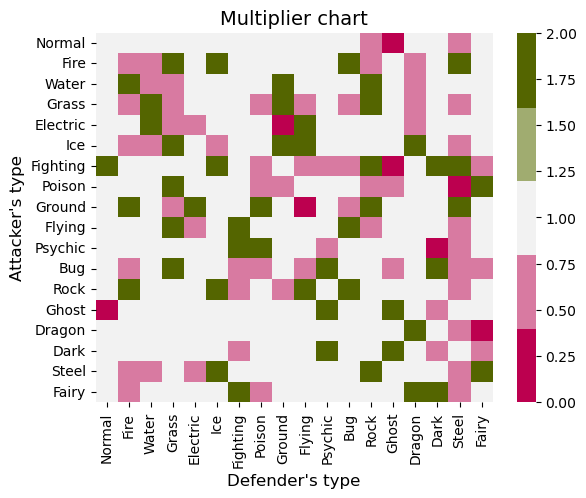

In [7]:
customPalette = sns.diverging_palette(0, 100, s=100, l=40, sep=2, n=5, center = 'light')
graph1 = sns.heatmap(multipliers, cmap = customPalette, center = 1, robust = True)
graph1.set_title("Multiplier chart", fontsize = 14)
plt.xlabel('Defender\'s type', fontsize = 12)
plt.ylabel('Attacker\'s type', fontsize = 12)

In [8]:
pokedata1 = pokedata.drop(pokedata[pokedata.capture_rate == '30 (Meteorite)255 (Core)'].index)
pokedata1['capture_rate'] = pd.to_numeric(pokedata1['capture_rate'], errors = 'raise')
pokedata1.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate           int64
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

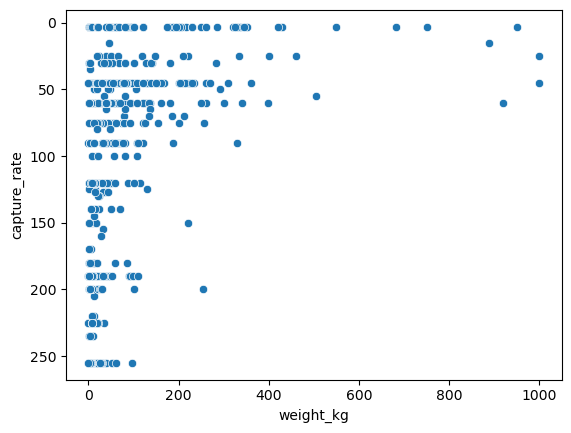

In [9]:
sns.scatterplot(data = pokedata1, x = 'weight_kg', y ='capture_rate').invert_yaxis()

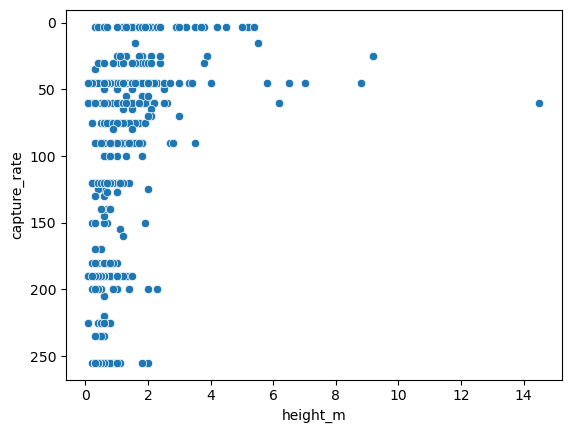

In [10]:
sns.scatterplot(data = pokedata1, x = 'height_m', y ='capture_rate').invert_yaxis()

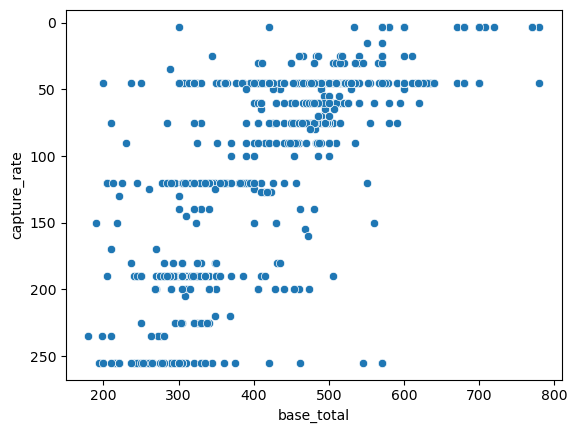

In [11]:
sns.scatterplot(data = pokedata1, x = 'base_total', y ='capture_rate').invert_yaxis()

<Axes: ylabel='Frequency'>

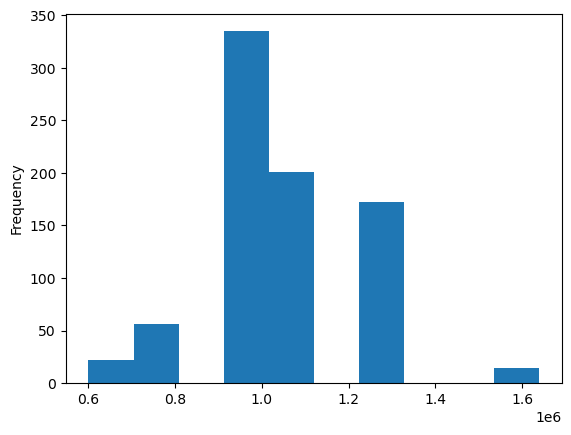

In [12]:
pokedata1['experience_growth'].plot(kind='hist')


<Axes: ylabel='Frequency'>

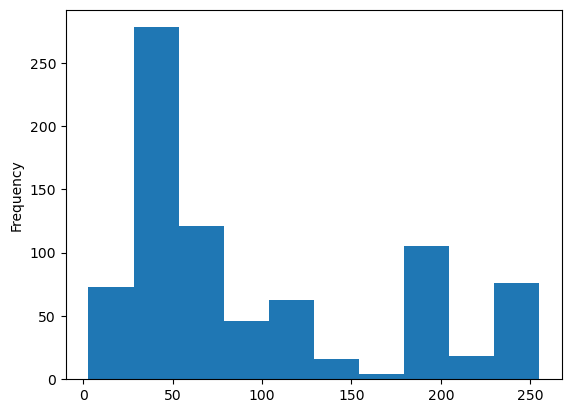

In [13]:
pokedata1['capture_rate'].plot(kind='hist')

<Axes: ylabel='Frequency'>

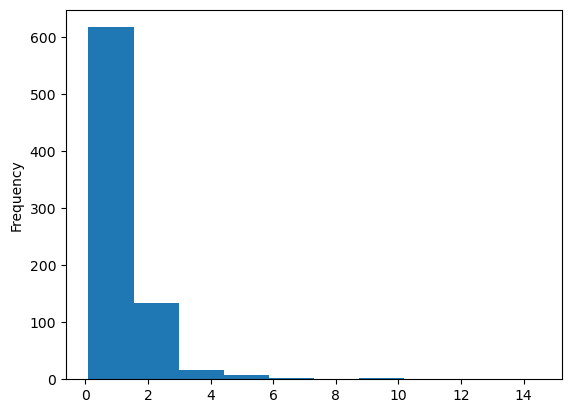

In [14]:
pokedata1['height_m'].plot(kind='hist')

<Axes: ylabel='Frequency'>

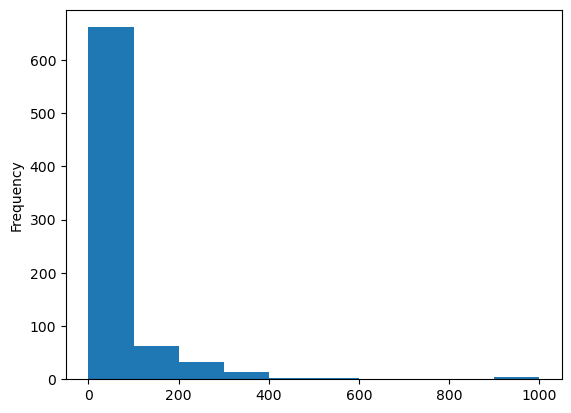

In [15]:
pokedata1['weight_kg'].plot(kind='hist')

<Axes: ylabel='Frequency'>

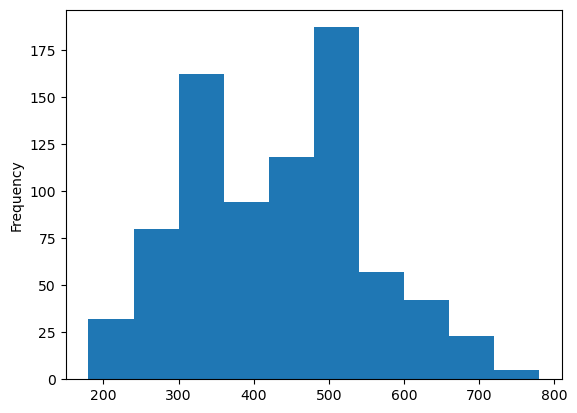

In [16]:
pokedata1['base_total'].plot(kind='hist')

In [17]:
pokedata1['capture_rate'].corr(pokedata1['weight_kg'])

-0.3273858637218935

In [18]:
pokedata1['capture_rate'].corr(pokedata1['height_m'])

-0.3830492285608503

In [19]:
pokedata1['capture_rate'].corr(pokedata1['base_total'])

-0.7121201962428769

In [144]:
pokedata2 = pokedata1[['attack', 'base_total', 'capture_rate', 'defense', 'experience_growth',
                     'height_m', 'hp','name', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary']]

In [240]:
# replikuję każdy wiersz (każdy pokemon występuje teraz dwa razy)

pokedata3 = pd.DataFrame(np.repeat(pokedata2.values, 2, axis=0))

# przydzielam ponownie nazwy kolumn
    
pokedata3.columns = pokedata2.columns


In [241]:
# kilka pokemonów ma ten sam typ w type1 i type2, naprawiam to zastępując type2 NaNem
pokedata3.type2 = pd.np.where(pokedata3.type2 == pokedata3.type1, np.nan, pokedata3.type2) 

# w co drugim indeksie zastępuję wartość z type 1 na type3
pokedata3.type1 = pd.np.where(pokedata3.index % 2 == 0, pokedata3.type2, pokedata3.type1)

# tworzę nowy df bez kolumny type2, która już nie jest potrzebna
pokedata4 = pokedata3[['attack', 'base_total', 'capture_rate', 'defense', 'experience_growth',
                     'height_m', 'hp','name', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'weight_kg',
       'generation', 'is_legendary']]

# pozbywam się zduplikowanych pokemonów, które nie miały drugiego typu (a więc teraz mają NaN w pierwszym typie)

pokedata5 = pokedata4[pokedata4['type1'].notna()]

C:\Users\oem\AppData\Local\Temp\ipykernel_8772\982167573.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pokedata3.type2 = pd.np.where(pokedata3.type2 == pokedata3.type1, np.nan, pokedata3.type2)
C:\Users\oem\AppData\Local\Temp\ipykernel_8772\982167573.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pokedata3.type1 = pd.np.where(pokedata3.index % 2 == 0, pokedata3.type2, pokedata3.type1)


In [242]:
pokedata5

,attack,base_total,capture_rate,defense,experience_growth,height_m,hp,name,pokedex_number,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,49,318,45,49,1059860,0.7,45,Bulbasaur,1,65,65,45,poison,6.9,1,0
1,49,318,45,49,1059860,0.7,45,Bulbasaur,1,65,65,45,grass,6.9,1,0
2,62,405,45,63,1059860,1.0,60,Ivysaur,2,80,80,60,poison,13.0,1,0
3,62,405,45,63,1059860,1.0,60,Ivysaur,2,80,80,60,grass,13.0,1,0
4,100,625,45,123,1059860,2.0,80,Venusaur,3,122,120,80,poison,100.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,101,570,15,53,1250000,5.5,223,Guzzlord,799,97,53,43,dragon,888.0,7,1
1595,101,570,15,53,1250000,5.5,223,Guzzlord,799,97,53,43,dark,888.0,7,1
1597,107,600,3,101,1250000,2.4,97,Necrozma,800,127,89,79,psychic,230.0,7,1
1598,95,600,3,115,1250000,1.0,80,Magearna,801,130,115,65,fairy,80.5,7,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'poison'),
  Text(1, 0, 'grass'),
  Text(2, 0, 'fire'),
  Text(3, 0, 'flying'),
  Text(4, 0, 'water'),
  Text(5, 0, 'bug'),
  Text(6, 0, 'normal'),
  Text(7, 0, 'dark'),
  Text(8, 0, 'electric'),
  Text(9, 0, 'ice'),
  Text(10, 0, 'ground'),
  Text(11, 0, 'fairy'),
  Text(12, 0, 'fighting'),
  Text(13, 0, 'psychic'),
  Text(14, 0, 'rock'),
  Text(15, 0, 'steel'),
  Text(16, 0, 'ghost'),
  Text(17, 0, 'dragon')])

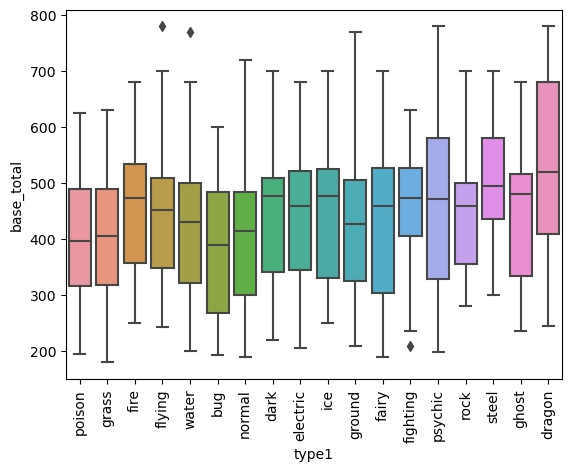

In [211]:
sns.boxplot(data=pokedata5, x="type1", y="base_total")
plt.xticks(rotation = 90)

In [218]:
pokedata5.groupby(['type1']).size()

type1
bug          77
dark         50
dragon       44
electric     47
fairy        47
fighting     53
fire         64
flying       97
ghost        41
grass        97
ground       64
ice          38
normal      109
poison       64
psychic      82
rock         58
steel        46
water       131
dtype: int64

In [236]:
print(len(pokedata.query('type2 == "bug" or type1 == "bug"')))
print(len(pokedata.query('type2 == "dark" or type1 == "dark"')))
print(len(pokedata.query('type2 == "electric" or type1 == "electric"')))

77
50
47
